## About iPython Notebooks ##

iPython Notebooks are interactive coding environments embedded in a webpage. You will be using iPython notebooks in this class. Make sure you fill in any place that says `# BEGIN CODE HERE #END CODE HERE`. After writing your code, you can run the cell by either pressing "SHIFT"+"ENTER" or by clicking on "Run" (denoted by a play symbol). Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). 

 **What you need to remember:**

- Run your cells using SHIFT+ENTER (or "Run cell")
- Write code in the designated areas using Python 3 only
- Do not modify the code outside of the designated areas
- In some cases you will also need to explain the results. There will also be designated areas for that. 

Fill in your **NAME** and **AEM** below:

In [ ]:
NAME = "Thomas Eleftheriadis"
AEM = "3236"

# Mini assessment

This assessment gives you a brief introduction to the NetworkX library. NetworkX is a python library for graphs. To complete this assessment, you can guide [NetworkX documentation](https://networkx.org/documentation/stable/reference/index.html).

## Import the libraries

Run the below cell to import the libraries.

In [ ]:
# Run this cell
import requests
import json
import networkx as nx
import matplotlib.pyplot as plt

## Download data

Run the bellow cell to get the Twitter data in the `data` variable. The data contains a list of 1921 tweets that contain the hashtag #ελισσαβετ. This hashtag was created when Queen Elizabeth II died by Twitter users.

In [ ]:
# Run this cell
url = 'https://drive.google.com/u/1/uc?id=1ngDx0bNya_0kh_tRwhyEgw5vMBFBHjkw&export=download'
res = requests.get(url)
data = res.json()

Run the cell below to see the Tweet object. The cell will print the first row from the `data` variable.

In [ ]:
# Run this cell
data[0]

{'_id': {'$oid': '632485805a7650a4a19b04ce'},
 'reply_settings': 'everyone',
 'conversation_id': 1570776062543679500,
 'author_id': 2967448373,
 'referenced_tweets': [{'type': 'retweeted', 'id': 1570493032159649800}],
 'text': 'RT @KYTKYTKYTKYTKYT: Κοιτάχτε χάλι ο "βασιλευς"! 😂\n\n#Καρολος #ελισσαβετ #QueenElisabeth #Meghan #Charles https://t.co/o9pCuttj5V',
 'source': 'Twitter for Android',
 'entities': {'mentions': [{'start': 3,
    'end': 19,
    'username': 'KYTKYTKYTKYTKYT',
    'id': '1052877677605134336'}],
  'urls': [{'start': 105,
    'end': 128,
    'url': 'https://t.co/o9pCuttj5V',
    'expanded_url': 'https://twitter.com/KYTKYTKYTKYTKYT/status/1570493032159649792/photo/1',
    'display_url': 'pic.twitter.com/o9pCuttj5V',
    'media_key': '3_1570492729934712833'}],
  'hashtags': [{'start': 52, 'end': 60, 'tag': 'Καρολος'},
   {'start': 61, 'end': 71, 'tag': 'ελισσαβετ'},
   {'start': 72, 'end': 87, 'tag': 'QueenElisabeth'},
   {'start': 88, 'end': 95, 'tag': 'Meghan'},
   {'

## Graph creation

**Exercise**: Create the mentioned undirected graph using the Twitter data from the `data` variable. On Twitter, a user can mention a user by adding his username to his tweet. Look at the tweets object from the `data` variable and find the included mentions. The user that created the tweet can be found under the author field. So to create the mentioned graph, you need to add an edge between the author and the users he mentioned in the tweet. Then, you need to remove the isolated nodes and keep only the giant connected component. Finally, save the graph instance in the `graph` variable.

In [ ]:
graph = nx.Graph()
# BEGIN CODE HERE

#we add a node per tweet per author.username
#and if there are mentions in this tweet we add an edge with each username mention
for i in data:
  x = i['author']['username']
  graph.add_node(x)
  #print(x) 
  if 'mentions' in i['entities']:
    for j in i['entities']['mentions']:
      y = j['username']
      #print(x,y)
      graph.add_edge(x,y)

#we find the single nodes (isolates) and we remove them from the graph
list(nx.isolates(graph))
graph.remove_nodes_from(list(nx.isolates(graph)))

#we sort all the graph components and we keep only the giant connected component
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
graph = graph.subgraph(Gcc[0])

# END CODE HERE

## Graph properties

In the section, you need to calculate some graph properties.

**Exercise**: Calculate the total number of nodes.

In [ ]:
# BEGIN CODE HERE

graph.number_of_nodes()

# END CODE HERE

953

**Exercise**: Calculate the total number of edges.

In [ ]:
# BEGIN CODE HERE

graph.number_of_edges()

# END CODE HERE

1146

**Exercise**: Calculate and display the five most important users.

In [ ]:
# BEGIN CODE HERE

#we sort the nodes by degree and display the highest 5
sorted_degree = sorted(graph.degree, key= lambda x: x[1], reverse=True)
for d in sorted_degree[:5]:
  print(d)
  
# END CODE HERE

('ViGreece', 203)
('ntalaoura', 111)
('sofilakis', 84)
('Brigitte_fr_', 82)
('OlgaMarkatou3', 64)


## Graph Visualization

Visualize the graph that you have created using the below code cell.

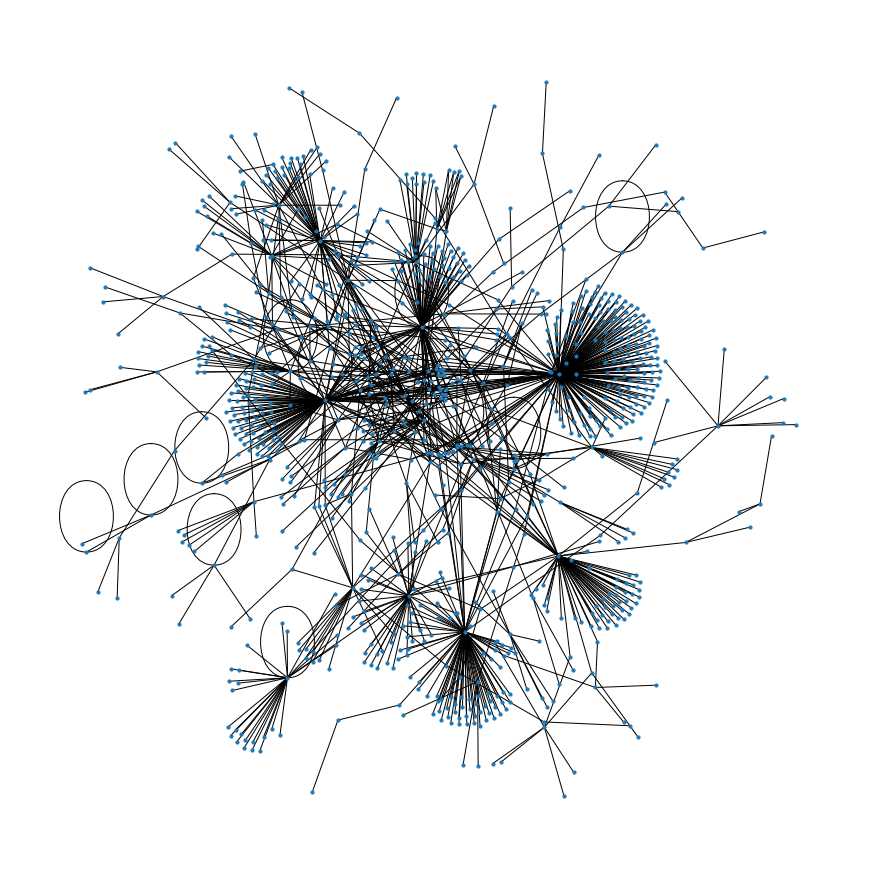

In [ ]:
# Run this cell
plt.figure(3,figsize=(12,12)) 
pos = nx.spring_layout(graph, k=0.1, seed=0)
nx.draw(graph, pos, node_size=10, font_size=8)

If the graph has been created successfully, then the image should be the same as below.

<img src='https://drive.google.com/uc?id=1fHnHQK1uZxeEzisQ78qdnOzhivQ1e0OM' />